In [13]:
# Modules used 
import numpy as np 
import pandas as pd 
import glob 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Collection
data_all = glob.glob("D:/vs/SDA/*.csv")
df = []
for file in data_all:
    sf = pd.read_csv(file)
    df.append(sf)

df = pd.concat(df , ignore_index=True)
print(df.head())

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP      Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366.0  2.687719e+15     NaN           9859619.0   
1  893.90  941.38   4581338.0  4.312765e+14     NaN           1453278.0   
2  884.20  888.09   5124121.0  4.550658e+14     NaN           1069678.0   
3  921.55  929.17   4609762.0  4.283257e+14     NaN           1260913.0   
4  969.30  965.65   2977470.0  2.875200e+14     NaN            816123.0   

   %Deliverble Company Name Industry ISIN Code  
0       0.3612          N

C:\Users\rverm\AppData\Local\Temp\ipykernel_10904\207134722.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df , ignore_index=True)


In [3]:
# Data Modification and Clearing
print(df.describe())
print(df.isnull().sum())

df_fill = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
print(df_fill.isnull().sum())

df_clean = df.dropna()
print(df_clean.isnull().sum())
print(df_clean)
print(df_fill.dtypes)

          Prev Close           Open           High            Low  \
count  470384.000000  470384.000000  470384.000000  470384.000000   
mean     1266.196349    1267.759708    1286.581440    1247.488465   
std      2581.367576    2585.256861    2619.646432    2546.618689   
min         0.000000       8.500000       9.750000       8.500000   
25%       274.300000     275.000000     279.500000     269.600000   
50%       566.500000     567.025000     576.900000     556.500000   
75%      1242.200000    1243.312500    1263.000000    1221.650000   
max     32861.950000   33399.950000   33480.000000   32468.100000   

                Last          Close           VWAP        Volume  \
count  470384.000000  470384.000000  470384.000000  4.703840e+05   
mean     1266.388302    1266.554351    1267.132300  3.045903e+06   
std      2581.389799    2582.138197    2582.697234  7.333973e+06   
min         9.100000       9.150000       9.210000  3.000000e+00   
25%       274.400000     274.350000   

In [4]:
# finding mean of every stock at closing period
avg_close = df_fill.groupby('Symbol')['Close'].mean()
print(avg_close)

Symbol
ADANIPORTS     294.323213
ASIANPAINT    1247.412707
AXISBANK       824.124076
BAJAJ-AUTO    2190.267955
BAJAJFINSV    2758.424419
                 ...     
UTIBANK        163.126203
VEDL           183.658838
WIPRO          754.523033
ZEEL           297.655527
ZEETELE        225.774415
Name: Close, Length: 66, dtype: float64


In [5]:
# Finding mean value of stock weekly closing price

#converting date into datetime frame
try:
    df_fill['Date'] = pd.to_datetime(df_fill['Date'])
except:
    print(f"Error converting 'Date' to datetime : {e}")

df_fill.set_index('Date', inplace=True)

In [6]:
#Resampling df_fill to calculate weekly mean
try:
    weekly_mean = df_fill['Close'].resample('W').mean()
    print(weekly_mean)
except KeyError:
    print("Error: 'Close' column not found in df_fill")
except Exception as e:
    print(f"An error occurred : {e}")

Date
2000-01-09    1036.438182
2000-01-16     971.858876
2000-01-23     989.100588
2000-01-30     968.599265
2000-02-06     892.391765
                 ...     
2021-04-04    2598.996599
2021-04-11    2630.558163
2021-04-18    2593.998214
2021-04-25    2546.292092
2021-05-02    2568.320612
Name: Close, Length: 1113, dtype: float64


In [7]:
# Now Calcuating MACD indicator
short_term_window = 12
long_term_window = 26
df_fill['ShortEMA'] = df_fill['Close'].ewm(span=short_term_window,adjust=False).mean()
df_fill['LongEMA'] = df_fill['Close'].ewm(span=long_term_window,adjust=False).mean()
df_fill['MACD'] = df_fill['ShortEMA'] - df_fill['LongEMA']

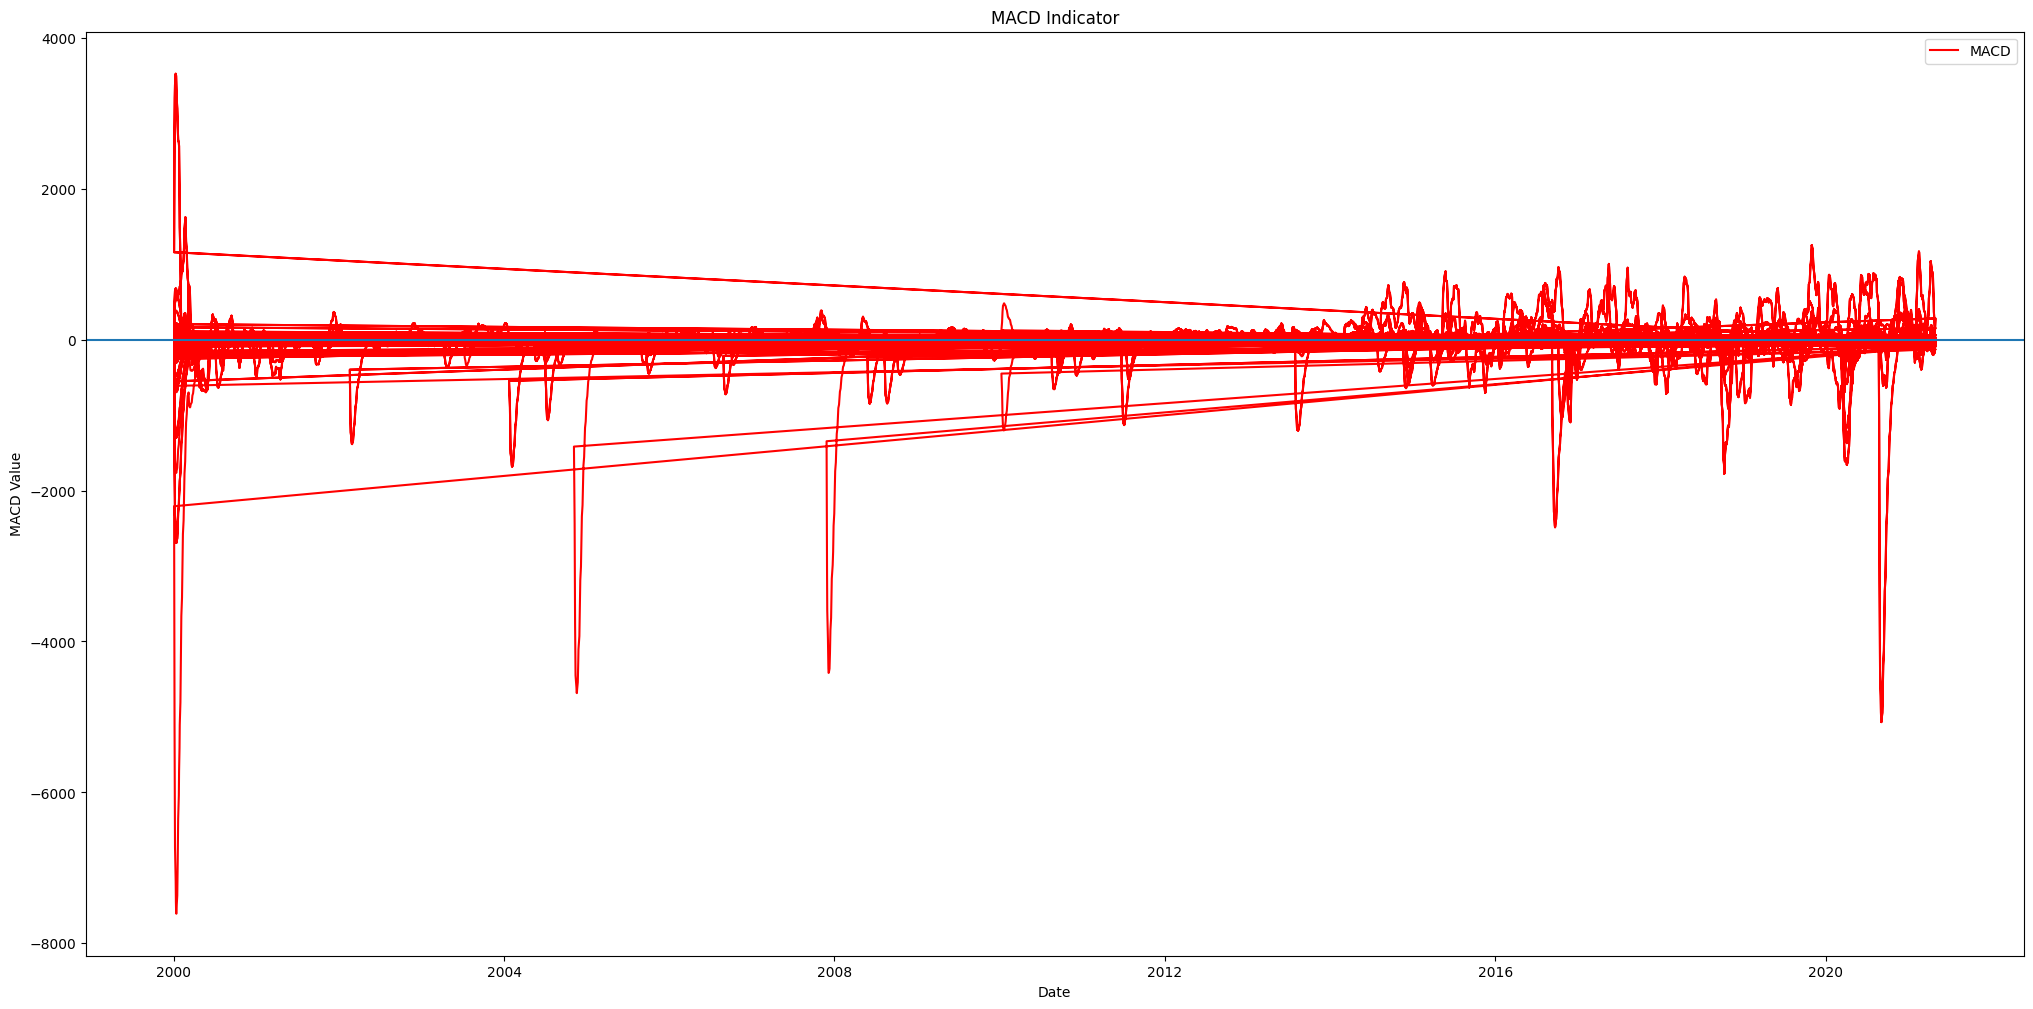

In [8]:
# Ploting MACD 

plt.figure(figsize=(25,12))
plt.plot(df_fill.index, df_fill['MACD'], label = 'MACD', color = 'Red')
plt.axhline(y=0)
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('MACD Indicator')
plt.legend()
plt.show()

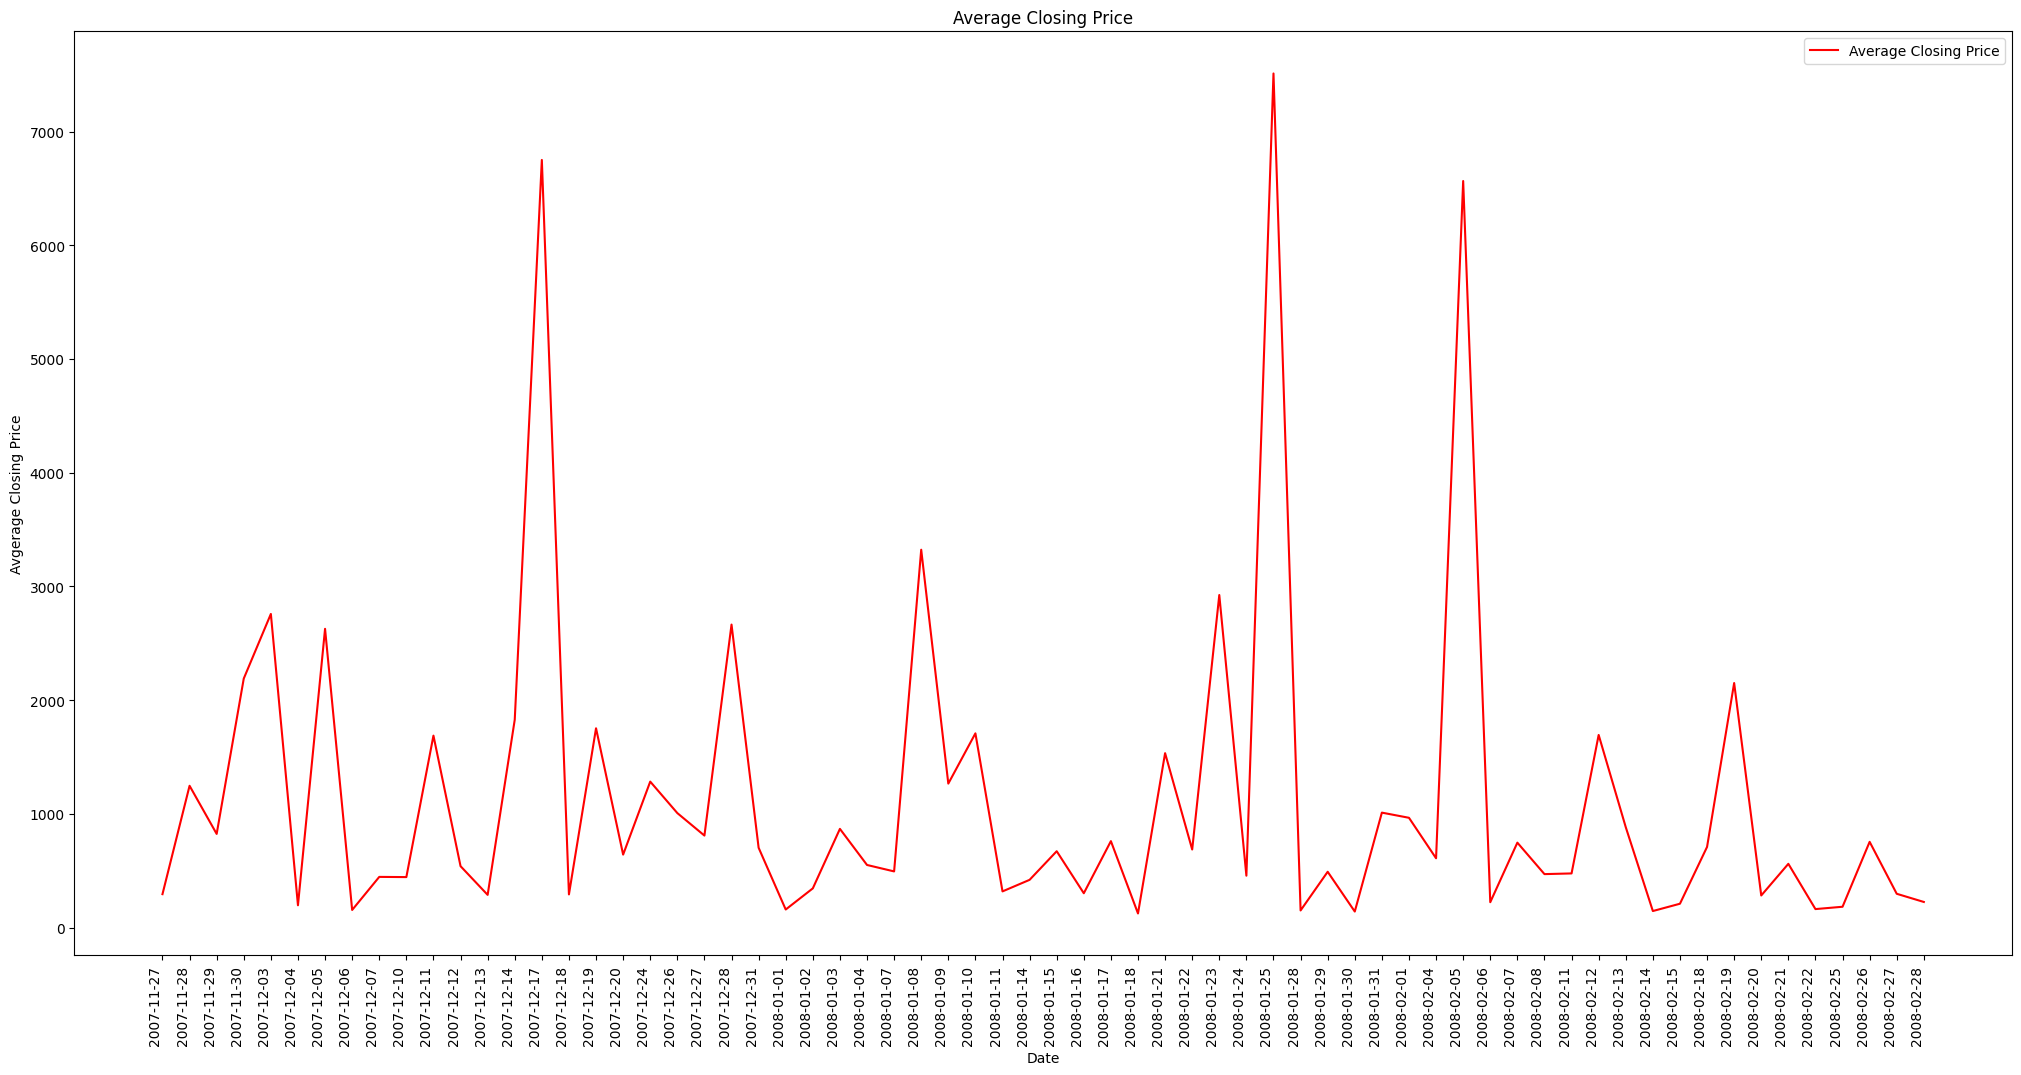

In [9]:
# Average closing price
df['Date'] = df['Date'].astype(str)
df_sub = df.iloc[:len(avg_close)]

plt.figure(figsize=(25,12))
plt.plot(df_sub['Date'],avg_close,label = 'Average Closing Price',color = 'Red')
plt.title('Average Closing Price')
plt.xlabel('Date')
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Avgerage Closing Price')
plt.legend()
plt.show()

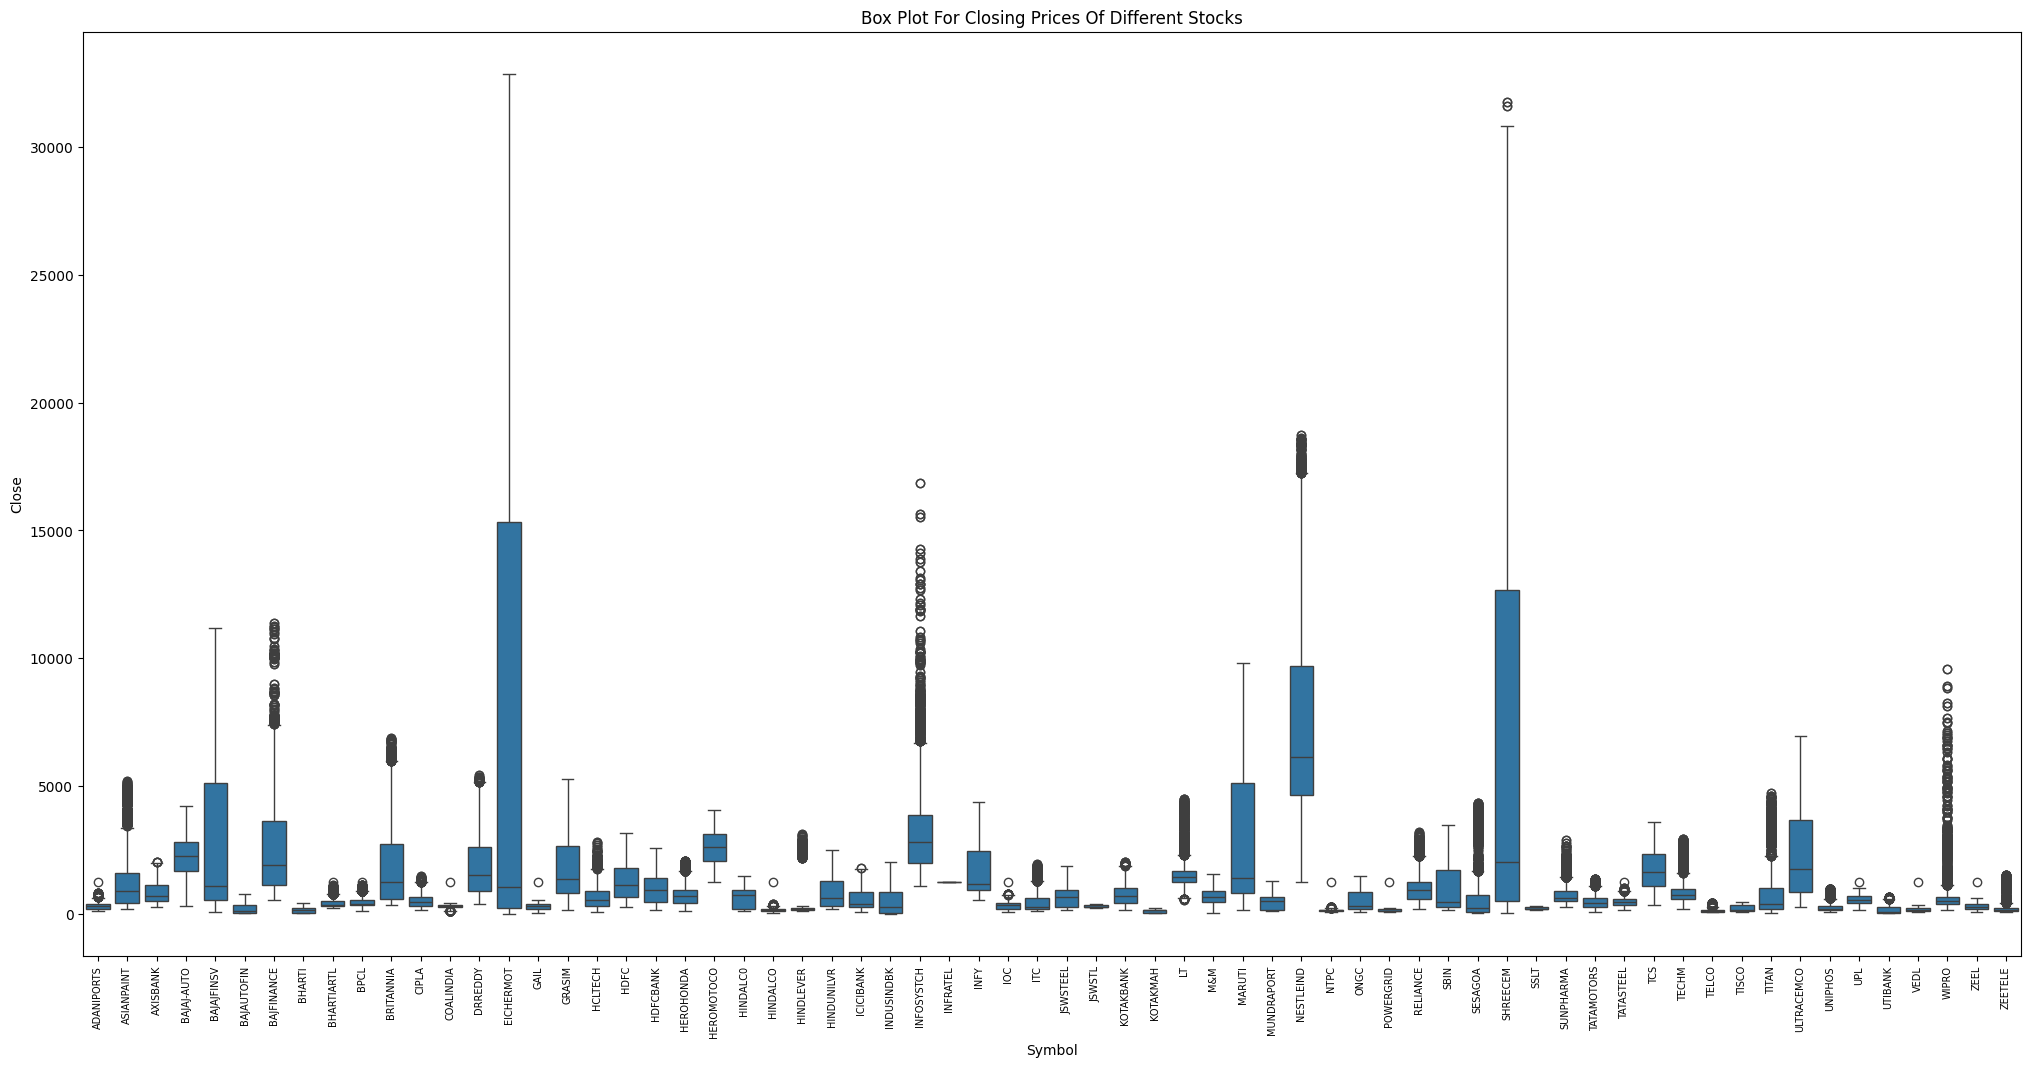

In [10]:
# Box plot for close price according to different stocks

df_fill['Symbol'] = df_fill['Symbol'].astype('category')

plt.figure(figsize=(25,12))
sns.boxplot(x ='Symbol',y = 'Close', data = df_fill, whis = 1.5)
plt.xticks(rotation =90,fontsize = 7)
plt.title('Box Plot For Closing Prices Of Different Stocks')
plt.show()

In [11]:
# Now lets Compare some specific stocks
dn_1 = pd.read_csv('BPCL.csv')
dn_2 = pd.read_csv('GAIL.csv')
dn_3 = pd.read_csv('ONGC.csv')
dn_4 =pd.read_csv('RELIANCE.csv')

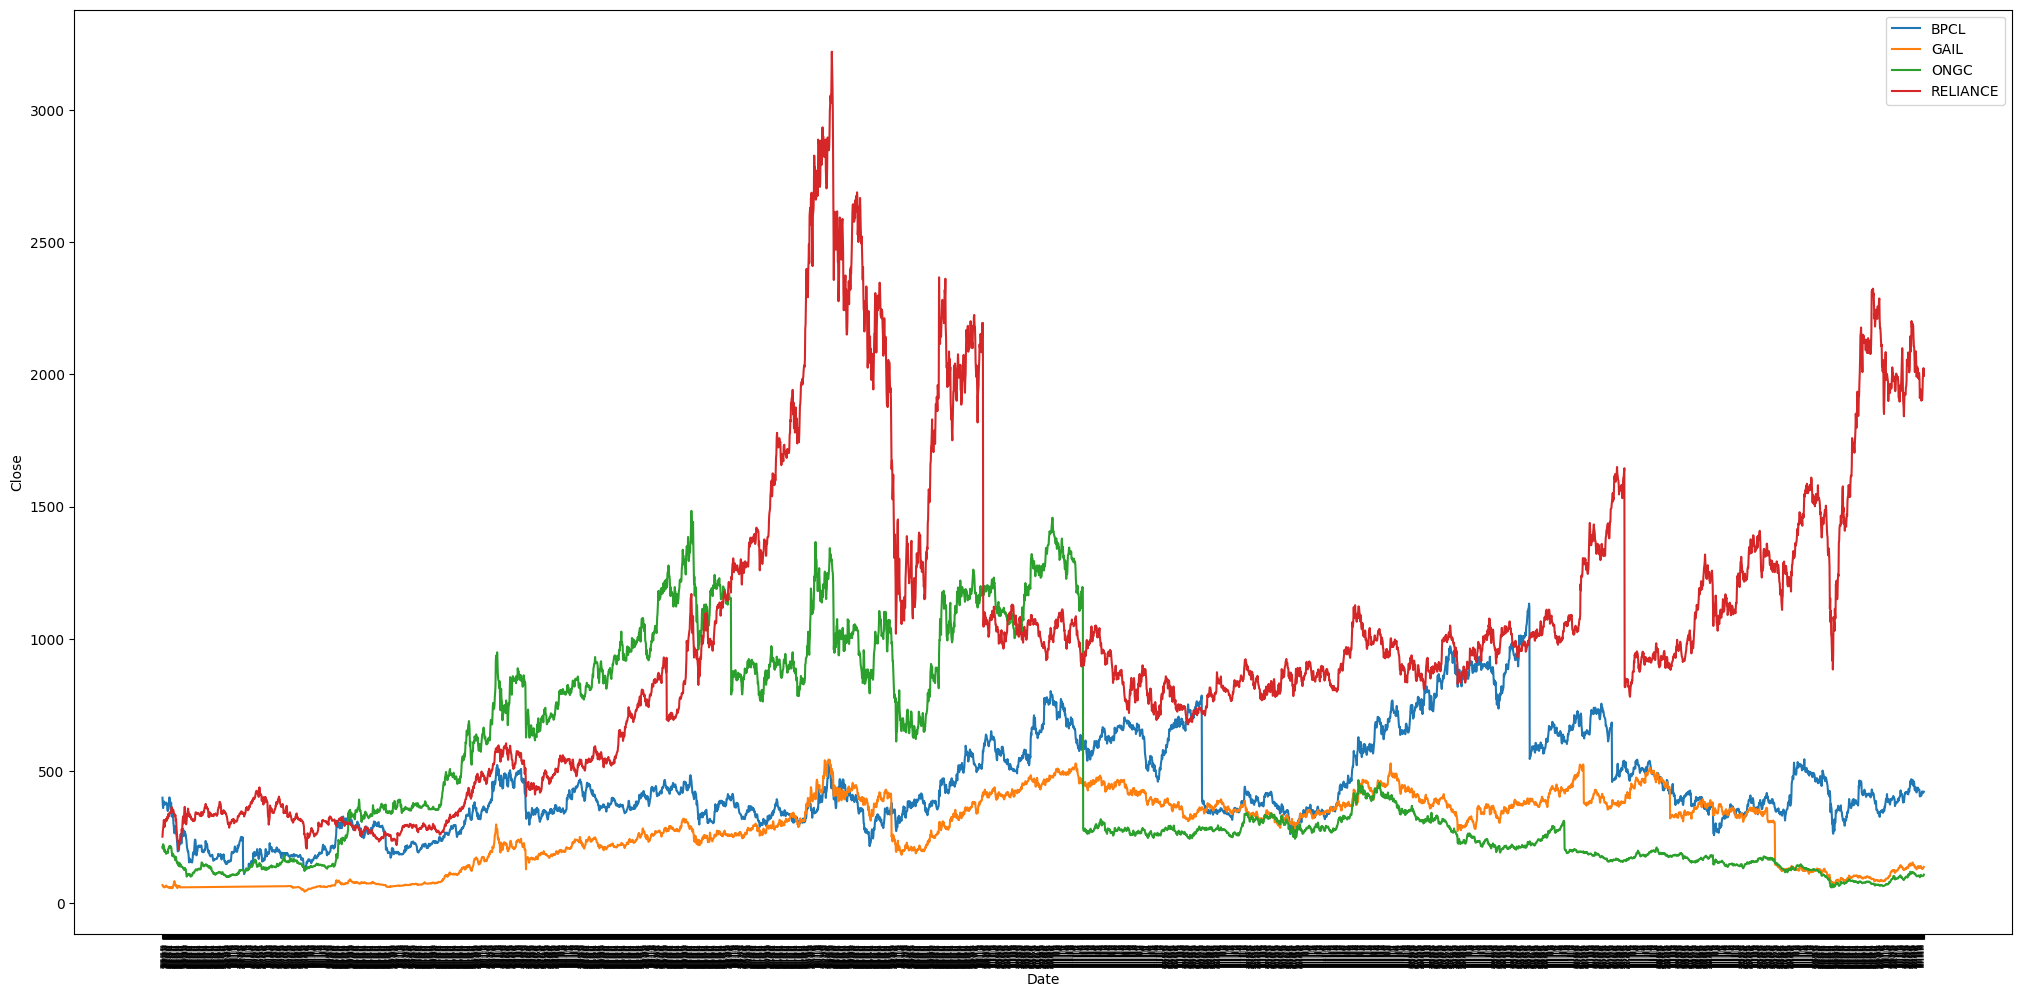

In [12]:
# Plot their closing price over different time 
plt.figure(figsize=(25,12))

sns.lineplot(x ='Date',y = 'Close',data = dn_1, label = 'BPCL')
sns.lineplot(x ='Date',y = 'Close',data = dn_2, label = 'GAIL')
sns.lineplot(x ='Date',y = 'Close',data = dn_3, label = 'ONGC')
sns.lineplot(x ='Date',y = 'Close',data = dn_4, label = 'RELIANCE')
plt.xticks(rotation = 90, fontsize = 3)
plt.show()